## Deep Learning

* Full name: Đinh Anh Huy
* Student ID: 18110103

In [ ]:
import tensorflow as tf 
import keras 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Load fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Split data to training and validation set
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, 
                                                                          random_state=0,
                                                                          test_size=0.1)
print("> Shape of training set  : ", train_images.shape)
print("> Shape of validation set: ", valid_images.shape)
print("> Shape of testing set   : ", test_images.shape)

> Shape of training set  :  (54000, 28, 28)
> Shape of validation set:  (6000, 28, 28)
> Shape of testing set   :  (10000, 28, 28)


### Bài tập 1.

**Hãy tạo và huấn luyện một mạng neurons theo cấu trúc sau trên tập MNIST**

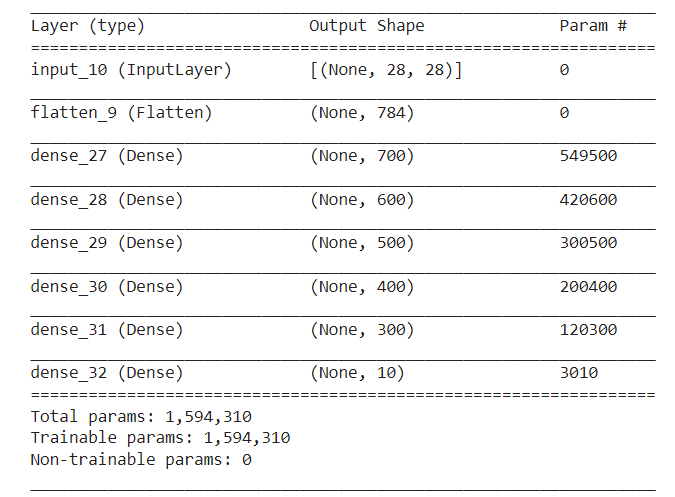

In [ ]:
Input = tf.keras.layers.Input(shape=(28,28))
Flatten = tf.keras.layers.Flatten()(Input)
Dense1 = tf.keras.layers.Dense(units=700, activation="relu")(Flatten)
Dense2 = tf.keras.layers.Dense(units=600, activation="relu")(Dense1)
Dense3 = tf.keras.layers.Dense(units=500, activation="relu")(Dense2)
Dense4 = tf.keras.layers.Dense(units=400, activation="relu")(Dense3)
Dense5 = tf.keras.layers.Dense(units=300, activation="relu")(Dense4)
Output = tf.keras.layers.Dense(units=len(np.unique(train_labels)), activation="softmax")(Dense5)

model = tf.keras.models.Model(inputs=Input, outputs=Output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 700)               549500    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               420600    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               120300

### Bài tập 2.

**Nêu cách tính số Param #.**

* **Input layer**: Input layer chỉ truyền vào kích thước của input data, nên không có parameter ở layer này. Do đó, **parameters = 0**.

* **Flatten layer**: Flatten layer chỉ thực hiện flatten input data nên cũng không có parameter ở layer này. Do đó, **parameters = 0**.

* **Fully Connected Layer (FC)**: Các layer dạng này thực hiện kết nối (product) giữa từng node của layer trước đó với tất cả các node của layer hiện tại, có kèm theo bias. Do đó, số lượng parameters trong các layers này sẽ là tích của tổng số node của layer trước đó với tổng số node của layer hiện lại kèm theo bias. Tức là, **parameters = current layer neurons * (previous layer neurons + 1)**.

### Bài tập 3.
**Tính độ chính xác trên tập test.**

In [ ]:
# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3/150), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=["accuracy"])


history = model.fit(x=train_images, y=train_labels, epochs=150, 
                    batch_size=100, verbose=1,
                    validation_data=(valid_images, valid_labels))

Epoch 1/150
540/540 [==============================] - 4s 6ms/step - loss: 1.6260 - accuracy: 0.7887 - val_loss: 0.4425 - val_accuracy: 0.8450
Epoch 2/150
540/540 [==============================] - 3s 6ms/step - loss: 0.4099 - accuracy: 0.8512 - val_loss: 0.4497 - val_accuracy: 0.8370
Epoch 3/150
540/540 [==============================] - 3s 6ms/step - loss: 0.3701 - accuracy: 0.8652 - val_loss: 0.3966 - val_accuracy: 0.8545
Epoch 4/150
540/540 [==============================] - 3s 6ms/step - loss: 0.3531 - accuracy: 0.8717 - val_loss: 0.3418 - val_accuracy: 0.8767
Epoch 5/150
540/540 [==============================] - 3s 6ms/step - loss: 0.3379 - accuracy: 0.8766 - val_loss: 0.3816 - val_accuracy: 0.8655
Epoch 6/150
540/540 [==============================] - 3s 6ms/step - loss: 0.3273 - accuracy: 0.8803 - val_loss: 0.3861 - val_accuracy: 0.8695
Epoch 7/150
540/540 [==============================] - 3s 6ms/step - loss: 0.3221 - accuracy: 0.8827 - val_loss: 0.3644 - val_accuracy: 0.8742

In [ ]:
evaluation = model.evaluate(test_images, test_labels)
print("Accuracy of model: {}, and loss: {}.".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 1s 3ms/step - loss: 1.4952 - accuracy: 0.8938
Accuracy of model: 0.8938000202178955, and loss: 1.4952179193496704.
